# **Import and other Reqs**

In [0]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=897e31ecae48add30497661b568c8e0e1d9e0838066318d2090bfd20f2221720
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [0]:
import spacy
from spacy import displacy
import wikipedia
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
nlp = spacy.load('en') #en for english, fr for french and so on

In [0]:
from spacy.lang.en.stop_words import STOP_WORDS

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
"""
!ls   #similar to linux ls command
%cd ..   #similar to linux directory navigation
%cd 'My Drive/CIS_508/Colab Notebooks/NER' 
"""

# **Read text document**

In [0]:
doc = nlp("SpaCY is a cool tool")
doc

SpaCY is a cool tool

# **Read from a file**

In [0]:
myfile = open('/gdrive/My Drive/CIS_508/Colab Notebooks/NER/trial.txt').read()
docfile = nlp(myfile)
docfile

Hey there! what's up with you?
I am good. How are you?
I went on a trip to London for the break. Enjoyed my time there.
I visited my cousins in London too. Such a small world

# **Read from wikipedia**

In [0]:
page = wikipedia.page("Vinodhini")
page_url = page.url
page_title = page.title
content = page.content

wikitext = nlp(content)

# **Explore the basic functions**

In [0]:
print(docx)
print("\n",docfile)

SpaCY is a cool tool

 Hey there! what's up with you?
I am good. How are you?
I went on a trip to London for the break. Enjoyed my time there.
I visited my cousins in London too. Such a small world


In [0]:
print(docx.text)
print(docfile.text)

SpaCY is a cool tool
Hey there! what's up with you?
I am good. How are you?
I went on a trip to London for the break. Enjoyed my time there.
I visited my cousins in London too. Such a small world


# **Tokenization - Sentence Tokens**

In [0]:
num = 1
for sentence in docfile.sents:
  print(str(num), ": ", sentence)
  num += 1

1 :  Hey there! what's up with you?

2 :  I am good.
3 :  How are you?

4 :  I went on a trip to London for the break.
5 :  Enjoyed my time there.

6 :  I visited my cousins in London too.
7 :  Such a small world


In [0]:
for num, sentence in enumerate(docfile.sents):  #enum starts from 0
  print(f'{num}: {sentence}')

0: Hey there! what's up with you?

1: I am good.
2: How are you?

3: I went on a trip to London for the break.
4: Enjoyed my time there.

5: I visited my cousins in London too.
6: Such a small world


# **Tokenization - Word Tokens**

In [0]:
for word in docx:
  print(word.text) #word.text and word are the same here 

#get a list of word tokens
words = [word for word in docx]
words

SpaCY
is
a
cool
tool


[SpaCY, is, a, cool, tool]

In [0]:
for word in docfile:
  print(word)

words = [word.text for word in docfile]
words

In [0]:
#split using spaces are not exactly same because word tokenizer takes care of the punctuation and other nuances. But the basic idea is that 
docfile.text.split(" ")

# **Other word functions**

In [0]:
for word in docfile:
  print(word.text, word.shape_)

In [0]:
for word in docx:
  print(word.text, word.shape_, word.is_alpha, word.is_stop) #word.shape is not human readable format

SpaCY XxxXX True False
is xx True True
a x True True
cool xxxx True False
tool xxxx True False


# **POS Tagging**

In [0]:
for word in docx:
  print(word.text, word.pos_) #word.pos is not in human readable form

SpaCY PROPN
is VERB
a DET
cool ADJ
tool NOUN


'determiner'

In [0]:
print(spacy.explain('DET'))
print(spacy.explain('PROPN'))

determiner
proper noun


In [0]:
#Now let us mess with Spacy and see if it is able to tag the infamous sentence
buff = nlp('Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo')
buff

Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo

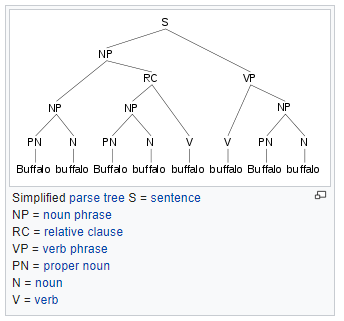

In [0]:
for word in buff:
  print(word.text, word.pos_)

# Ofcourse it doesn't tag it right, because it is a very complicated sentence 

Buffalo PROPN
buffalo NOUN
Buffalo PROPN
buffalo NOUN
buffalo NOUN
buffalo NOUN
Buffalo PROPN
buffalo NOUN


In [0]:
for word in nlp('I fish a fish'):
  print(word.text, word.pos_, word.tag_)   

#spacy got this sentence right

I PRON PRP
fish VERB VBP
a DET DT
fish NOUN NN


In [0]:
spacy.explain('VBP')

'verb, non-3rd person singular present'

In [0]:
for word in nlp('All the faith I had had no effect on the outcome of my life'):
  print((word.text, word.pos_, word.tag_)) 

('All', 'DET', 'PDT')
('the', 'DET', 'DT')
('faith', 'NOUN', 'NN')
('I', 'PRON', 'PRP')
('had', 'VERB', 'VBD')
('had', 'VERB', 'VBN')
('no', 'DET', 'DT')
('effect', 'NOUN', 'NN')
('on', 'ADP', 'IN')
('the', 'DET', 'DT')
('outcome', 'NOUN', 'NN')
('of', 'ADP', 'IN')
('my', 'DET', 'PRP$')
('life', 'NOUN', 'NN')


In [0]:
print(spacy.explain('VBD'))
print(spacy.explain('VBN'))

verb, past tense
verb, past participle


# **Syntactical Dependency**

In [0]:
for word in nlp('Jack likes Rose'):
  print(word.text, word.pos_, word.tag_, word.dep_)

Jack PROPN NNP nsubj
likes VERB VBZ ROOT
Rose PROPN NNP advmod


In [0]:
spacy.explain('nsubj')

'nominal subject'

In [0]:
displacy.render(nlp('Jack likes Rose'), style = 'dep', jupyter = True)

# **Lemmatization**

Stemming just cuts the suffix and prefix wheras lemmatization turns words into meaningful root words

In [0]:
doc = nlp("Study studying studious studio student sturdy")
for word in doc:
  print(word.text, word.lemma_, word.pos_) 

Study study NOUN
studying study VERB
studious studious ADJ
studio studio NOUN
student student NOUN
sturdy sturdy NOUN


In [0]:
doc = nlp("She walks regularly. walking walks walked walker walkman was were be is")
for word in doc:
  print(word.text, word.lemma_, word.pos_) 

#she walks (walks) is identified as verb wheras the second walks is identified as noun. This is really good

She -PRON- PRON
walks walk VERB
regularly regularly ADV
. . PUNCT
walking walking NOUN
walks walk NOUN
walked walk VERB
walker walker NOUN
walkman walkman NOUN
was be VERB
were be VERB
be be VERB
is be VERB


# **Named Entity Recognition**

In [0]:
for word in docfile.ents:
  print(word.text, word.label_)

print("\n",docfile)

London GPE
London GPE

 Hey there! what's up with you?
I am good. How are you?
I went on a trip to London for the break. Enjoyed my time there.
I visited my cousins in London too. Such a small world


In [0]:
d = nlp("Facebook, America, Explosion.ai")
print(d)
for word in d.ents:
  print(word.text, word.label_)

Facebook, America, Explosion.ai
America GPE


In [0]:
displacy.render(docfile, style = 'ent', jupyter = True)

# **Visualizing with Displacy**

In [0]:
displacy.render(docfile, style = 'ent', options = options, jupyter = True)  #doesn't change for text display

In [0]:
options = {'compact':True, 'bg':'cornflowerblue', 'color':'#fff', 'font': 'Verdana'}

In [0]:
displacy.render(docfile, style = 'dep', options = options, jupyter = True)   #works well for pictorial display

In [0]:
svg = displacy.render(docfile, style = 'dep', options = options, jupyter = False)
with open('/gdrive/My Drive/CIS_508/Colab Notebooks/NER/Dependency.svg', 'w', encoding = 'utf-8') as f:
  f.write(svg)

# **Semantic Similarity**

Use case: Recommendation systems

In [0]:
dog = nlp("dog")
wolf = nlp("wolf")
elephant = nlp("elephant")
cat = nlp("cat")

In [0]:
dog.similarity(cat)  #higher the value more the similarity

0.7952184229586672

In [0]:
dog.similarity(wolf)

0.741333528369026

In [0]:
dog.similarity(elephant)

0.5863402738723138

In [0]:
smart = nlp("smart")
clever = nlp("clever")
foolish = nlp("foolish")

In [0]:
smart.similarity(clever)

0.5818587817189651

In [0]:
clever.similarity(foolish)  #weirdly clever and foolish are more similar than smart and clever.

0.6669069355583049

In [0]:
data = nlp("mom dad cat dog")
for i in data:
  for j in data:
    print((i, j, i.similarity(j)))

(mom, mom, 1.0)
(mom, dad, 0.6097823)
(mom, cat, 0.60294944)
(mom, dog, 0.45455447)
(dad, mom, 0.6097823)
(dad, dad, 1.0)
(dad, cat, 0.62087435)
(dad, dog, 0.5143671)
(cat, mom, 0.60294944)
(cat, dad, 0.62087435)
(cat, cat, 1.0)
(cat, dog, 0.62753606)
(dog, mom, 0.45455447)
(dog, dad, 0.5143671)
(dog, cat, 0.62753606)
(dog, dog, 1.0)


In [0]:
data_sim = [(i.text, j.text, i.similarity(j)) for j in data for i in data]
type(data_sim[0][0])

str

In [0]:
df = pd.DataFrame(data_sim, columns = ['Token 1', 'Token 2', 'Similarity'])
type(df['Token 1'][0])

str

In [0]:
df_viz = df.replace({'mom':0, 'dad':1, 'cat':2, 'dog':3})
df_viz

,Token 1,Token 2,Similarity
0,0,0,1.000000
1,1,0,0.609782
2,2,0,0.602949
3,3,0,0.454554
4,0,1,0.609782
5,1,1,1.000000
6,2,1,0.620874
7,3,1,0.514367
8,0,2,0.602949
9,1,2,0.620874


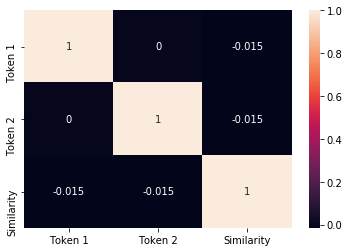

In [0]:
fig, ax = plt.subplots()
sns.heatmap(df_viz.corr(), annot = True)
plt.show()
#this makes no sense to me

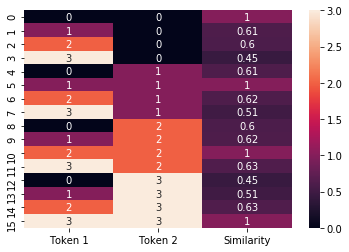

In [0]:
fig, ax = plt.subplots()
sns.heatmap(df_viz, annot = True)
plt.show()

# **StopWords Processing**

In [0]:
print(STOP_WORDS)

{'himself', 'much', 'nobody', 'again', 'as', 'either', 'perhaps', 'whither', 'without', 'never', 'everyone', 'toward', 'are', 'go', 'can', 'mine', 'hereafter', 'she', 'yours', 'n’t', 'third', 'everything', 'upon', 'just', 'somewhere', 'show', 'until', '‘s', 'unless', 'has', 'am', 'seems', "'s", 'been', 'below', 'forty', 'very', 'no', 'whoever', 'eleven', '‘m', 'name', 'down', 'other', 'keep', 'us', 'amongst', 'throughout', 'with', 'top', 'anywhere', 'almost', 'yourselves', 'towards', 'call', 'above', 'that', 'from', 'not', 'of', 're', 'even', 'sometime', 'than', 'elsewhere', 'those', 'nevertheless', 'wherein', "'re", 'seeming', 'when', 'thereupon', 'your', 'sixty', 'was', 'they', 'over', 'may', 'latterly', 'off', 'various', 'take', 'back', 'alone', 'enough', 'full', 'out', 'their', 'across', 'themselves', 'during', "'d", 'n‘t', 'is', 'all', 'except', 'made', 'still', 'to', 'four', 'must', 'through', 'might', 'always', '’ve', "n't", '‘re', 'anyone', 'ever', 'an', 'everywhere', 'hence', 

In [0]:
for word in docx:
  print(word.text, word.is_stop)

SpaCY False
is True
a True
cool False
tool False


In [0]:
nlp.vocab["Hamburger"].is_stop

False

In [0]:
for word in docx:
  if word.is_stop:
    print(word.text)

is
a


In [0]:
non_stop_words = [ word for word in docx if word.is_stop == False]
non_stop_words

[SpaCY, cool, tool]

In [0]:
lol = nlp("lol")
for word in lol:
  print(word.is_stop)

False


Add new stop words to the list

In [0]:
#In normal spacy vocabulary for enlish language London and cousins are not stop_words
for word in docfile:
  if word.is_stop:
    print((word.text, word.is_stop))

('there', True)
('what', True)
("'s", True)
('up', True)
('with', True)
('you', True)
('I', True)
('am', True)
('How', True)
('are', True)
('you', True)
('I', True)
('on', True)
('a', True)
('to', True)
('for', True)
('the', True)
('my', True)
('there', True)
('I', True)
('my', True)
('in', True)
('too', True)
('Such', True)
('a', True)


In [0]:
custom_stop_words = ["London", "cousins"] 

In [0]:
#we have manually over-written the is_stop for those custom stop words
for word in custom_stop_words:
  nlp.vocab[word].is_stop = True

In [0]:
#now London and cousins appear in the stop words list
for word in docfile:
  if word.is_stop:
    print((word.text, word.is_stop))

('there', True)
('what', True)
("'s", True)
('up', True)
('with', True)
('you', True)
('I', True)
('am', True)
('How', True)
('are', True)
('you', True)
('I', True)
('on', True)
('a', True)
('to', True)
('London', True)
('for', True)
('the', True)
('my', True)
('there', True)
('I', True)
('my', True)
('cousins', True)
('in', True)
('London', True)
('too', True)
('Such', True)
('a', True)


In [0]:
#reset London and cousins back
for word in custom_stop_words:
  nlp.vocab[word].is_stop = False

# **Noun Chunks**

In [0]:
doc = nlp("The man, although he had good looks, kept sulking about his fat body")

In [0]:
#retrieve chunks of nouns like below
for token in doc.noun_chunks:
  print(token.text)

The man
he
good looks
his fat body


In [0]:
#get to the root word of the chunks
for token in doc.noun_chunks:  
  print(token.root.text)

man
he
looks
body


In [0]:
#head of the nouns
for token in doc.noun_chunks:
  print(token.root.text, "..", token.root.head.text)

man .. kept
he .. had
looks .. had
body .. about


# **Sentence Boundary detection**

In [0]:
def mycustom_boundary(docx):
  for token in docx[:-1]:
    if (token.text == '---'):
       docx[token.i+1].is_sent_start = True
  return docx

In [0]:
nlp.add_pipe(mycustom_boundary, before='parser')

In [0]:
#figure out what is wrong
my_sent = nlp(u"Helloooo --- what are you --- doing")
for s in my_sent.sents:
  print(s)